Aura Wind Energy Solutions - Corlic Hill Community Wind Farm Forecast outputs

Total Energy Generated: 2351 GWh
Community Funding Raised: £12 million
Total Initial Costs: £22.5 million
Rent Costs: £11.6 million
Loan Principle Repaid: £12.7 million
Interest Paid: £0.5 million
Compensation Payments: £2.2 million
Maintenance Costs: £37.4 million
Community Impact Payments £3.2 million
Total Costs: £89.7 million

Revenue: £164.5 million
Profit Returned to Aura Wind Energy Solutions: £48.7 million
Profit Returned to Community Investors: £46.8 million
Total Profit: £95.6 million

Return on investment (ROI): 383%
Compound Annual Growth Rate (CAGR): 5.52%
Loan repaid and profitable by the end of year 5


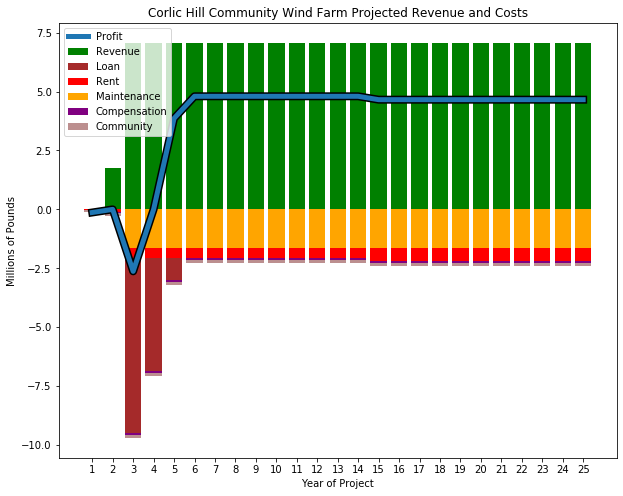

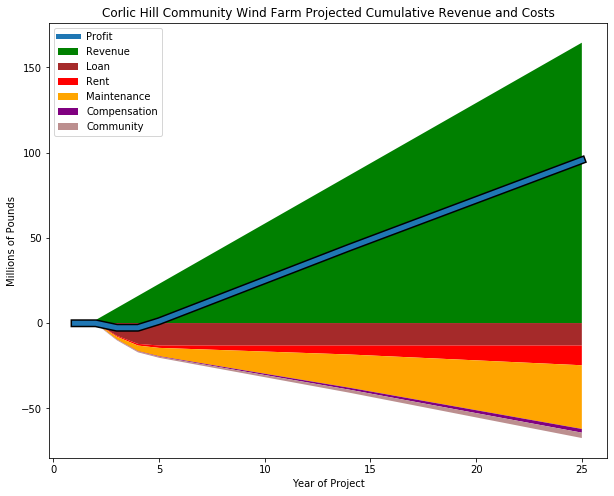

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import math

'''set initial parameters - change depending on plan'''

#information about company and site names to be used on the graph
companyName='Aura Wind Energy Solutions'
siteName='Corlic Hill Community Wind Farm'

#turbine type information to be used in calculations
t1Count = 0.0 
t2Count = 7.0 
t3Count = 0.0 

#distance from grid in KM
gridConnection = 2.5 

#percentage of time turbines can produce electricity, expressed as a decimal from 0 to 1
capFactor = 0.458 

#time in years for baseline surveys
surveyTime=1

#time taken to construct windfarm, expressed as a decimal from 0 to 1 year
constructionTime=0.75

#if applicable, how much MWh anually needs to be compensated to another farm due to wake losses
otherFarmLoss=1340

#community impact fund rate per MWh
payPerMWh=0.005

#other initial costs
eiaCost=0.054
birdSurvey=0.14
metmast=0.094

#community ownership percentage - should be <50 for the company to still control decisions
communityOwnership=0.49

'''Constants based on the brief - shouldn't need to change'''
timeHorizon=25#how long project runs for in years
electricityPrice=70/1000000 #electricity price in £/MWh
gridCost=0.75 #one off payment of £750,000 per kilometer
balanceOfPlant=1.25 #one off payment of 25% of turbine cost
# cost of each turbine in millions of pounds
t1Cost=1.29 
t2Cost=2.322 
t3Cost=4.3344 
#turbine rating in MWh
t1Power=2.5 
t2Power=3.6 
t3Power=5.6
maintenance=0.1 #annual maintenance costs
fixedRent=6000/1000000 #get fixed rent in millions
fixedRentLater=8000/1000000 #fixed rent after 13 years in millions
landRent=0.06 #6 percent before 13 years and 6 percent after for rent
landRentLater=0.08

#get total turbine cost based on sum of turbines and their costs
turbineCost = t1Count*t1Cost+t2Count*t2Cost+t3Count*t3Cost
#get total initial cost by adding balance of plant costs and grid connection
bopCosts = turbineCost*(balanceOfPlant-1)
gridCosts= gridConnection*gridCost
totalInitialCost=turbineCost+bopCosts+gridCosts+metmast+birdSurvey+eiaCost

#further compensatory costs to other stakeholders may be required

#calculate total power rating based on sum of turbines and their power ratings
powerRating=t1Count*t1Power+t2Count*t2Power+t3Count*t3Power
powerGeneratedHourly=powerRating*capFactor
powerGenAnnually=powerGeneratedHourly*24*365
#get annual revenue from power generation figure, to be used in the loop later
annualInitialRevenue=powerGenAnnually*electricityPrice
#calculate revenue to be compensated to another farm in case of wake loss
compensation=otherFarmLoss*electricityPrice
compensationRatio=1-(otherFarmLoss/powerGenAnnually)
#calculate revenue to be given to the community
annualCommunityPayment=payPerMWh*powerRating

#calculate and set amounts to be used in the time series loop
maintenanceCost=turbineCost*maintenance

#amount of time before the turbines are ready to spin
timeToProduction=math.ceil(surveyTime+constructionTime)

#calculate loan size required, and increase loan amount to account for unexpected costs
marginOfSafety=0.1
#account for community payments during construction
loanCommunityPayment=annualCommunityPayment*(surveyTime+constructionTime)
#calculate the cost of the rent during the time of construction and surveying
loanRent=fixedRent*(constructionTime+surveyTime)+(landRent*(annualInitialRevenue*(1-constructionTime))-(annualInitialRevenue*(1-constructionTime)))
#add up all components, multiplies by how much is funde dby the community
initLoanSize=(totalInitialCost+loanCommunityPayment+loanRent+maintenanceCost)*(1+marginOfSafety)*(1-communityOwnership)
communityFundingRequired=(totalInitialCost+loanCommunityPayment+loanRent+maintenanceCost)*(1+marginOfSafety)*(communityOwnership)
loanAmount=initLoanSize

#section to calculate the loan interest rate, based on loan size
if initLoanSize<50:
    interestRate=0.01
elif initLoanSize<90:
    interestRate=0.03
elif initLoanSize<110:
    interestRate=0.05
else:
    interestRate=0.08

#create empty arrays which will be popuated in the time series 
revenueArray=np.zeros(25, dtype=float)
costArray=np.zeros(25, dtype=float)
profitArray=np.zeros(25, dtype=float)
repaymentArray=np.zeros(25, dtype=float)
maintenanceArray=np.zeros(25, dtype=float)
rentArray=np.zeros(25, dtype=float)
compensationArray=np.zeros(25, dtype=float)
energyArray=np.zeros(25,dtype=float)
communityArray=np.zeros(25,dtype=float)

#set initial balance to be used in the time series, to calculate loan repayment schedule
balance = initLoanSize-(totalInitialCost*(1-communityOwnership))
#initialise time series variables 
thisMaintenance=0
annualEnergy=0

#loop for the amount of years set earlier
for x in range(0,timeHorizon):
    '''calculate revenue generated based on current project year
    and work out how much money needs to be sent away to another farm if applicable'''
    
    #no revenue is generated due to the baseline survey being conducted
    if x<math.ceil(surveyTime): 
        annualRevenue=0 
        annualCompensation=0
        annualEnergy=0
    #reduce revenue by duration of construction time 
    elif (x<timeToProduction):
        annualRevenue = annualInitialRevenue * (1-constructionTime) 
        annualCompensation=compensation*(1-constructionTime) 
        annualEnergy=powerGenAnnually*(1-constructionTime)
    #otherwise, we assume full initial revenue as estimated earlier
    else:
        annualRevenue = annualInitialRevenue
        annualCompensation=compensation
        annualEnergy=powerGenAnnually
    #increase balance by the revenue generated this year, and add it to the revenue array
    balance+=annualRevenue
    energyArray[x]=annualEnergy
    revenueArray[x]=annualRevenue    
    #do the same for compensation
    balance-=annualCompensation
    compensationArray[x]=annualCompensation
    
    '''account for community impact fund'''
    #community benefits
    balance-=annualCommunityPayment
    communityArray[x]=annualCommunityPayment
    
    '''calculate annual rent payments, which are based on revenue'''
    #for the first 13 years rent is lower
    if (x<=13): 
        annualRent=fixedRent+landRent*annualRevenue
    else:
        annualRent=fixedRentLater+landRentLater*annualRevenue
        
    #decrease balance by the rent paid this year, and add it to the rent array
    balance-=annualRent
    rentArray[x]=annualRent
    
    '''calculate maintenance costs based on how long surveying takes'''
    #only included once construction starts
    if(x>math.ceil(surveyTime)):
        thisMaintenance=maintenanceCost        
    #decrease balance by the rent paid this year, and add it to the rent array
    maintenanceArray[x]=thisMaintenance
    balance-=thisMaintenance

    
    #may need to add social and environmental costs
    
    '''calculate loan repayment amounts'''
    #only applies if there is still a loan left 
    if (loanAmount>0):
        interestIncrease=loanAmount*interestRate
        loanAmount*=(1+interestRate) #add interest to loan before repayment 
        #don't repay loan while no revenue is generated
        if(annualRevenue==0):
            repaymentAmount=0
        #repay loan depending on how much is left
        # don't repay if construction is ongoing, in case of going overbudget
        elif (loanAmount>balance and x>=timeToProduction):
            repaymentAmount=balance
            loanAmount-=repaymentAmount
        
         #at this point construction is still ongoing and we shouldnt'r repay
        elif(loanAmount>balance):
            continue
        #fully repay loan
        else:
            repaymentAmount=loanAmount
            loanAmount=0
    else:
        repaymentAmount=0
    repaymentArray[x]=repaymentAmount
    balance-=repaymentAmount
    
    #add data to arrays
    costArray[x]=(thisMaintenance+repaymentAmount+annualRent+annualCompensation+annualCommunityPayment)
    annualProfit=revenueArray[x]-costArray[x]
    profitArray[x]=annualProfit
    '''end of for loop'''

#calculate totals
totalProfit = np.sum(profitArray)
totalRevenue= np.sum(revenueArray)
totalCost=np.sum(costArray)+totalInitialCost
totalRentPaid=np.sum(rentArray)
totalMaintenancePaid=np.sum(maintenanceArray)
totalLoanPaid=np.sum(repaymentArray)
totalCompensationPaid=np.sum(compensationArray)
totalEnergyGenerated=np.sum(energyArray)
totalCommunity=np.sum(communityArray)

'''Print estimated costs and revenue'''
print(companyName + " - " + siteName + " Forecast outputs\n")
#sort for full amount
print(f'Total Energy Generated: {round(totalEnergyGenerated/1000)} GWh')
print(f'Community Funding Raised: £{round(communityFundingRequired)} million')
print(f'Total Initial Costs: £{round(totalInitialCost,1)} million')
print(f'Rent Costs: £{round(totalRentPaid,1)} million')
print(f'Loan Principle Repaid: £{round((initLoanSize),1)} million')
print(f'Interest Paid: £{round((totalLoanPaid-initLoanSize),1)} million')
print(f'Compensation Payments: £{round(totalCompensationPaid,1)} million')
print(f'Maintenance Costs: £{round(totalMaintenancePaid,1)} million')
print(f'Community Impact Payments £{round(totalCommunity,1)} million')
print(f'Total Costs: £{round(totalCost,1)} million\n')
print(f'Revenue: £{round(totalRevenue,1)} million')
print(f'Profit Returned to {companyName}: £{round((totalProfit*(1-communityOwnership)),1)} million')
print(f'Profit Returned to Community Investors: £{round((totalProfit*(communityOwnership)),1)} million')
print(f'Total Profit: £{round(totalProfit,1)} million\n')

#calculate and print financial metrics
ROI=(totalProfit/(initLoanSize+communityFundingRequired))*100 #return on investment
CAGR=((totalProfit/(initLoanSize+communityFundingRequired))**(1/25)-1)*100
print(f'Return on investment (ROI): {round(ROI)}%')
print(f'Compound Annual Growth Rate (CAGR): {round(CAGR,2)}%')

#find when the loan is fully repaid and therefore profit made
print(f'Loan repaid and profitable by the end of year {(np.array(repaymentArray)[timeToProduction:].tolist().index(0))+timeToProduction}')
#create cumulative arrays based on annual data
cumProfitArray=np.cumsum(profitArray)
cumRentArray=np.cumsum(rentArray)
cumMaintenanceArray=np.cumsum(maintenanceArray)
cumRepaymentArray=np.cumsum(repaymentArray)
cumRevenueArray=np.cumsum(revenueArray)
cumCompensationArray=np.cumsum(compensationArray)
cumEnergyArray=np.cumsum(energyArray)
cumCommunityArray=np.cumsum(communityArray)

#plot some graphs to display information
ind=np.arange(start=1,stop=26,step=1)
'''uncomment below to show two simple graphs'''
'''

plt.figure(figsize=(10, 8))
colours = ['red' if (x < 0) else 'green' for x in profitArray ]
plt.bar(ind, profitArray, width=0.8, label='Revenue', color=colours)
plt.title(siteName + " Projected Annual Profit/Loss")
plt.ylabel("Millions of Pounds")
plt.xlabel("Year of Project")
plt.show()

plt.figure(figsize=(10, 8))
plt.plot(ind,cumProfitArray,linewidth=5)
plt.ylabel("Millions of Pounds")
plt.xlabel("Year of Project")
plt.title(siteName + " Projected Cumulative Profit/Loss")
plt.show()
'''
added=np.add(np.negative(rentArray),np.negative(maintenanceArray))
added2=np.add(np.negative(repaymentArray), added)
plt.figure(figsize=(10, 8))
plt.plot(ind,profitArray,linewidth=8.0,color='black')
plt.plot(ind,profitArray,linewidth=5.0,label='Profit')
plt.bar(ind, revenueArray, width=0.8, label='Revenue', color='green')
plt.bar(ind, np.negative(repaymentArray), width=0.8, label='Loan', color='brown', bottom=added)
plt.bar(ind, np.negative(rentArray), width=0.8, label='Rent', color='red', bottom=np.negative(maintenanceArray))
plt.bar(ind, np.negative(maintenanceArray), width=0.8, label='Maintenance', color='orange')
plt.bar(ind, np.negative(compensationArray), width=0.8, label='Compensation', color='purple', bottom=added2)
plt.bar(ind, np.negative(communityArray), width=0.8, label='Community', color='rosybrown', bottom=np.add(np.negative(compensationArray), added2))

plt.xticks(ind,ind)
plt.ylabel("Millions of Pounds")
plt.xlabel("Year of Project")
plt.legend(loc="upper left")
plt.title(siteName + " Projected Revenue and Costs")
plt.show()

plt.figure(figsize=(10, 8))
plt.plot(ind,cumProfitArray,linewidth=8.0,color='black')
plt.plot(ind,cumProfitArray,linewidth=5.0,label='Profit')
plt.stackplot(ind,cumRevenueArray,labels=['Revenue'],colors=['green'])
plt.stackplot(ind,np.negative(cumRepaymentArray), np.negative(cumRentArray), np.negative(cumMaintenanceArray),np.negative(cumCompensationArray),np.negative(cumCommunityArray), labels=['Loan','Rent','Maintenance', 'Compensation', 'Community'],colors=['brown','red','orange','purple', 'rosybrown'])
plt.legend(loc='upper left')
plt.xlabel("Year of Project")
plt.ylabel("Millions of Pounds")
plt.title(siteName + " Projected Cumulative Revenue and Costs")
plt.show()